In [5]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from matplotlib import pyplot
from google.colab import files
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.utils import class_weight

uploaded = files.upload()
seed = 7
numpy.random.seed(seed)

Saving MTA_DELAY_DATA_DUMP - Sheet1 (1).csv to MTA_DELAY_DATA_DUMP - Sheet1 (1) (1).csv


In [12]:
from sklearn.utils import resample

raw_data = pd.read_csv('MTA_DELAY_DATA_DUMP - Sheet1 (1) (1).csv')

df_majority = raw_data[raw_data['RESULT']==0].iloc[1:-2,0:3].dropna()
df_minority = raw_data[raw_data['RESULT']==1].iloc[1:-2,0:3].dropna()
print(raw_data['RESULT'].value_counts())

#1146,123
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1381,     # to match minority class
                                 random_state=124) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print(df_downsampled['RESULT'].value_counts())
print(numpy.unique(df_downsampled['RESULT']))

X = df_downsampled.iloc[1:-2,0:2].dropna()
Y = df_downsampled.iloc[1:-2,2:3].dropna()

print(Y)


0.0    20752
1.0     1381
Name: RESULT, dtype: int64
0.0    1381
1.0    1378
Name: RESULT, dtype: int64
[0. 1.]
       RESULT
8670      0.0
8873      0.0
4197      0.0
13768     0.0
16361     0.0
4377      0.0
9572      0.0
21651     0.0
7500      0.0
18716     0.0
12800     0.0
19685     0.0
21622     0.0
7944      0.0
16486     0.0
2171      0.0
15018     0.0
11423     0.0
317       0.0
16121     0.0
65        0.0
8965      0.0
18454     0.0
14230     0.0
20225     0.0
21730     0.0
12504     0.0
10315     0.0
9899      0.0
4868      0.0
...       ...
22100     1.0
22101     1.0
22102     1.0
22103     1.0
22104     1.0
22105     1.0
22106     1.0
22107     1.0
22108     1.0
22109     1.0
22110     1.0
22111     1.0
22112     1.0
22113     1.0
22114     1.0
22115     1.0
22116     1.0
22117     1.0
22118     1.0
22119     1.0
22120     1.0
22121     1.0
22122     1.0
22123     1.0
22124     1.0
22125     1.0
22126     1.0
22127     1.0
22128     1.0
22129     1.0

[2756 rows x 1 colu

In [14]:
model = Sequential()
model.add(Dense(8, kernel_initializer='uniform', activation='relu',input_dim =2))
#model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.000001),metrics=['accuracy'])  
history = model.fit(X,Y,epochs=200,batch_size=15, shuffle = True, verbose = 1)

Epoch 1/200
2756/2756 [==============================] - 1s 201us/step - loss: 0.6931 - acc: 0.4978
Epoch 2/200
2756/2756 [==============================] - 0s 85us/step - loss: 0.6931 - acc: 0.4993
Epoch 3/200
2756/2756 [==============================] - 0s 86us/step - loss: 0.6931 - acc: 0.5025
Epoch 4/200
2756/2756 [==============================] - 0s 78us/step - loss: 0.6931 - acc: 0.5018
Epoch 5/200
2756/2756 [==============================] - 0s 65us/step - loss: 0.6931 - acc: 0.5004
Epoch 6/200
2756/2756 [==============================] - 0s 70us/step - loss: 0.6931 - acc: 0.4985
Epoch 7/200
2756/2756 [==============================] - 0s 71us/step - loss: 0.6931 - acc: 0.4993
Epoch 8/200
2756/2756 [==============================] - 0s 69us/step - loss: 0.6931 - acc: 0.4978
Epoch 9/200
2756/2756 [==============================] - 0s 67us/step - loss: 0.6931 - acc: 0.5065
Epoch 10/200
2756/2756 [==============================] - 0s 68us/step - loss: 0.6931 - acc: 0.4996
Epoch 11

In [0]:
#def create_model(neurons,batch_size,epochs,optimizer,init_mode,activation,dropout_rate):
def create_model(epochs):
    model = Sequential()
    model.add(Dense(4, kernel_initializer='uniform', activation='relu',input_dim =2))
    model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001),metrics=['accuracy'])  
    #history = model.fit(X,Y,epochs=epochs,batch_size=15, shuffle = True, verbose = 1)
    return model



model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
#batch_size = [15]
epochs = [100,150,200,350]
#learn_rate = [0.0000001,0.0001,0.001, 0.01, 0.1, 0.2, 0.3,1]
#optimizers  = ['SGD','Adagrad', 'Adadelta', 'Adam', 'Adamax']
#init_mode  = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
#activation  = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
#dropout_rate  = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#neurons  = [4,8,12,20,60]

param_grid = dict(epochs=epochs)
 #10 epochs with batchsize 80 #Best: 0.901256 using {'neurons': 20}
#param_grid = dict(neurons=neurons,batch_size=batch_size,epochs=epochs,optimizer=optimizers,init_mode=init_mode,activation=activation,dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid,verbose=100)
grid_result = grid.fit(X, Y)




# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [129]:
from sklearn.metrics import roc_auc_score

predict = model.predict_classes(X)
print(numpy.unique(predict))


predict = [val[0] for val in predict]

print("ras score: ",roc_auc_score(Y,predict))


predict = model.predict(numpy.array([0.2255,0.23]).reshape(-1,2))
print("result: ",predict[0][0])



[0 1]
('ras score: ', 0.5690790657088511)
('result: ', 0.4821377)


In [108]:
from sklearn.ensemble import RandomForestClassifier
clf_4 = RandomForestClassifier()
clf_4.fit(X, Y)
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( numpy.unique( pred_y_4 ) )


# What about AUROC?
single_test = clf_4.predict_proba(numpy.array([0.2255,0.23]).reshape(-1,2))

print(single_test[0][1])
prob_y_4 = clf_4.predict_proba(X)

  
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(Y, prob_y_4) )


[0. 1.]
0.4
0.9939890313025042


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


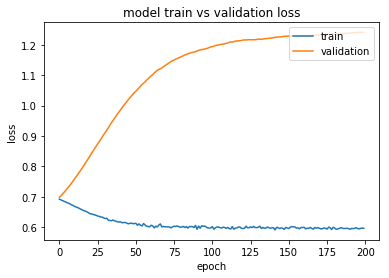

In [120]:
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()